# Setup

## Colab

In [1]:
# Mount the drive and move to dir
from google.colab import drive
drive.mount("/content/drive", force_remount = False)
%cd /content/drive/MyDrive/Coding/spread-res/runscr/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Coding/spread-res/runscr


## Imports

In [2]:
# Import importlib to reload modules and sys and os to add the path for other import
import importlib
import os
import sys

import torch

# Append the parent directory to the path to import the necessary modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Import the model architecture
from classes.models import BertGridNew

# Import the utilities and the dataloader
from utils import inferutil, setuputil, trainutil

# Now reload the modules to ensure they are up-to-date
importlib.reload(setuputil)
importlib.reload(trainutil)
importlib.reload(inferutil)
importlib.reload(BertGridNew)

# Import the model and funcs required from utils
from classes.models.BertGridNew import BertGridNew
from utils.inferutil import infer_full, infer_one
from utils.setuputil import display_config, setup_config
from utils.trainutil import train_model

## Configuration

device = cuda/mps:0 (env-specific), threads = 1 to inf (env-specific), seed = 0 to inf, data_dir = ../data, rows = 100, cols = 100, tokens = 32, save_dir = ../models/

In [3]:
# Setup the config
input_config = {
    # Environment and Model Info
    "env": "colab",
    "approach": "bert",
    "model_name": "BertGridNew",
    "model_base": "bert-base-cased",
    "data_ds": "250",
    # BERT Architecture Parameters
    "vocab_size": 30522,
    "hidden_size": 32,
    "num_hidden_layers": 1,
    "num_attention_heads": 1,
    "intermediate_size": 128,
    # Training Parameters
    "batch_size": 40,
    "lr": 1e-3,
    "mu": 0.25,
    "epochs": 50,
    "patience": 1,
    "save_int": 10,
}
config = setup_config(input_config)
display_config(config)

# Define local variables from the config dictionary
DEVICE = config["DEVICE"]
THREADS = config["THREADS"]

# Data loaders and vocab
train_loader = config["train_loader"]
val_loader = config["val_loader"]
test_loader = config["test_loader"]
tokenizer = config["tokenizer"]
model_base = config["model_base"]

# Training parameters
batch_size = config["batch_size"]
lr = config["lr"]
mu = config["mu"]
epochs = config["epochs"]
patience = config["patience"]
save_int = config["save_int"]
save_dir = config["save_dir"]
save_name = config["save_name"]

Processing files: 100%|██████████| 200/200 [00:38<00:00,  5.16it/s]



200(P) = 200(G) + 0(E)


Processing files: 100%|██████████| 25/25 [00:00<00:00, 39.55it/s]



25(P) = 25(G) + 0(E)


Processing files: 100%|██████████| 25/25 [00:00<00:00, 32.54it/s]



25(P) = 25(G) + 0(E)

FINAL CONFIG:
{
  "env": "colab",
  "approach": "bert",
  "DEVICE": "<device>",
  "THREADS": 10,
  "seed": 0,
  "model_base": "bert-base-cased",
  "model_name": "BertGridNew",
  "rows": 100,
  "cols": 100,
  "tokens": 32,
  "data_ds": "250",
  "data_dir": "../data",
  "train_dir": "../data/250_train",
  "val_dir": "../data/250_val",
  "test_dir": "../data/250_test",
  "tokenizer": "<BertTokenizerFast>",
  "vocab_size": 30522,
  "hidden_size": 32,
  "num_hidden_layers": 1,
  "num_attention_heads": 1,
  "intermediate_size": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "attention_probs_dropout_prob": 0.1,
  "max_position_embeddings": 64,
  "type_vocab_size": 2,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-12,
  "pad_token_id": 0,
  "gradient_checkpointing": false,
  "train_loader": "<LoaderBert>",
  "val_loader": "<LoaderBert>",
  "test_loader": "<LoaderBert>",
  "batch_size": 40,
  "lr": 0.001,
  "mu": 0.25,
  "epochs": 50,
  "patience": 1,
 

# Model Training

In [4]:
# Create and observe the model
untrained_model = BertGridNew(config).to(DEVICE)
print(untrained_model)

BertGridNew(
  (bertModel_cell): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 32, padding_idx=0)
      (position_embeddings): Embedding(64, 32)
      (token_type_embeddings): Embedding(2, 32)
      (LayerNorm): LayerNorm((32,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=32, out_features=32, bias=True)
              (key): Linear(in_features=32, out_features=32, bias=True)
              (value): Linear(in_features=32, out_features=32, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=32, out_features=32, bias=True)
              (LayerNorm): LayerNorm((32,), eps=1e-12, elementwise_affine=True)


## Training Metrics

1. GPU Model: 521 mb
2. GPU Training: 33.6 gb

3. Per Epoch Train Time: 3m10s
4. Per Epoch Val Time: 14s


In [5]:
# Train with adjusted batch size
trained_model = train_model(
    untrained_model,
    train_loader,
    val_loader,
    DEVICE,
    batch_size=batch_size,
    lr=lr,
    mu=mu,
    max_epochs=epochs,
    patience=patience,
    save_int=save_int,
    save_dir=save_dir,
    save_name=save_name,
    config=config,
)

Epoch 0


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.22s/it]


Train Loss: 1.3475e+00, Val Loss: 1.3633e+00


Epoch 1


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.18s/it]


Train Loss: 1.2081e+00, Val Loss: 1.2694e+00


Epoch 2


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.30s/it]


Train Loss: 1.1353e+00, Val Loss: 1.2128e+00


Epoch 3


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.31s/it]


Train Loss: 1.0844e+00, Val Loss: 1.1679e+00


Epoch 4


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.16s/it]


Train Loss: 1.0435e+00, Val Loss: 1.1289e+00


Epoch 5


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.21s/it]


Train Loss: 1.0133e+00, Val Loss: 1.0920e+00


Epoch 6


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.35s/it]


Train Loss: 9.8345e-01, Val Loss: 1.0586e+00


Epoch 7


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.08s/it]


Train Loss: 9.5284e-01, Val Loss: 1.0227e+00


Epoch 8


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.19s/it]


Train Loss: 9.2575e-01, Val Loss: 9.9196e-01


Epoch 9


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.19s/it]


Train Loss: 8.9618e-01, Val Loss: 9.5387e-01

Model Saved

Epoch 10


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.22s/it]


Train Loss: 8.6133e-01, Val Loss: 9.0924e-01


Epoch 11


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.10s/it]


Train Loss: 8.3073e-01, Val Loss: 8.7546e-01


Epoch 12


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.07s/it]


Train Loss: 7.9731e-01, Val Loss: 8.2893e-01


Epoch 13


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.18s/it]


Train Loss: 7.6429e-01, Val Loss: 7.8557e-01


Epoch 14


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.15s/it]


Train Loss: 7.3358e-01, Val Loss: 7.4781e-01


Epoch 15


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.01s/it]


Train Loss: 7.0565e-01, Val Loss: 7.1030e-01


Epoch 16


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.10s/it]


Train Loss: 6.8082e-01, Val Loss: 6.8478e-01


Epoch 17


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.17s/it]


Train Loss: 6.5596e-01, Val Loss: 6.5523e-01


Epoch 18


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.16s/it]


Train Loss: 6.3946e-01, Val Loss: 6.3183e-01


Epoch 19


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.05s/it]


Train Loss: 6.1952e-01, Val Loss: 6.0911e-01

Model Saved

Epoch 20


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.09s/it]


Train Loss: 6.0229e-01, Val Loss: 5.8975e-01


Epoch 21


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.12s/it]


Train Loss: 5.8609e-01, Val Loss: 5.7210e-01


Epoch 22


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.10s/it]


Train Loss: 5.7710e-01, Val Loss: 5.5852e-01


Epoch 23


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.18s/it]


Train Loss: 5.6005e-01, Val Loss: 5.4540e-01


Epoch 24


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.02s/it]


Train Loss: 5.5165e-01, Val Loss: 5.3208e-01


Epoch 25


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.06s/it]


Train Loss: 5.4099e-01, Val Loss: 5.2118e-01


Epoch 26


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.07s/it]


Train Loss: 5.3418e-01, Val Loss: 5.1210e-01


Epoch 27


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.06s/it]


Train Loss: 5.2227e-01, Val Loss: 5.0233e-01


Epoch 28


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.02s/it]


Train Loss: 5.1672e-01, Val Loss: 4.9282e-01


Epoch 29


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.07s/it]


Train Loss: 5.0570e-01, Val Loss: 4.8351e-01

Model Saved

Epoch 30


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.09s/it]


Train Loss: 4.9994e-01, Val Loss: 4.7555e-01


Epoch 31


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.16s/it]


Train Loss: 4.9226e-01, Val Loss: 4.6790e-01


Epoch 32


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.08s/it]


Train Loss: 4.8644e-01, Val Loss: 4.6090e-01


Epoch 33


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.12s/it]


Train Loss: 4.8081e-01, Val Loss: 4.5436e-01


Epoch 34


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.01s/it]


Train Loss: 4.7525e-01, Val Loss: 4.4840e-01


Epoch 35


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.02s/it]


Train Loss: 4.6967e-01, Val Loss: 4.4202e-01


Epoch 36


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.11s/it]


Train Loss: 4.6532e-01, Val Loss: 4.3624e-01


Epoch 37


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.49s/it]


Train Loss: 4.5890e-01, Val Loss: 4.3081e-01


Epoch 38


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.03s/it]


Train Loss: 4.5653e-01, Val Loss: 4.2592e-01


Epoch 39


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.05s/it]


Train Loss: 4.5014e-01, Val Loss: 4.2111e-01

Model Saved

Epoch 40


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.19s/it]


Train Loss: 4.4548e-01, Val Loss: 4.1639e-01


Epoch 41


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.08s/it]


Train Loss: 4.4227e-01, Val Loss: 4.1186e-01


Epoch 42


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.07s/it]


Train Loss: 4.3804e-01, Val Loss: 4.0766e-01


Epoch 43


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.04s/it]


Train Loss: 4.3507e-01, Val Loss: 4.0336e-01


Epoch 44


Validation Processing: 100%|██████████| 1/1 [00:14<00:00, 14.99s/it]


Train Loss: 4.3106e-01, Val Loss: 3.9956e-01


Epoch 45


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.24s/it]


Train Loss: 4.2773e-01, Val Loss: 3.9567e-01


Epoch 46


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.14s/it]


Train Loss: 4.2303e-01, Val Loss: 3.9159e-01


Epoch 47


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.10s/it]


Train Loss: 4.2139e-01, Val Loss: 3.8809e-01


Epoch 48


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.19s/it]


Train Loss: 4.1812e-01, Val Loss: 3.8477e-01


Epoch 49


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.09s/it]


Train Loss: 4.1479e-01, Val Loss: 3.8174e-01

Model Saved


TRAINING DONE at epoch 49, best epoch 49
Train Loss = 0.4147881090641022, Perplexity = 1.0000010369708103
Val Loss = 0.38174206018447876, Perplexity = 1.0000009543556059


# Evaluation

In [11]:
# Params
loc = 0
thresh = 0.87
infer_batch_size = 40

## Single Example


Filename: ../data/250_train/15action.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(86,0): 0.730200 | (62,0): 0.756764 | (96,0): 0.834321 | (10,0): 0.871810

NB to B ratio: Predicted = 9973:27 | Actual = 9996:4
Accuracy: 99.71% | Precision: 3.70% | Recall: 25.00% | F1-Score: 0.06



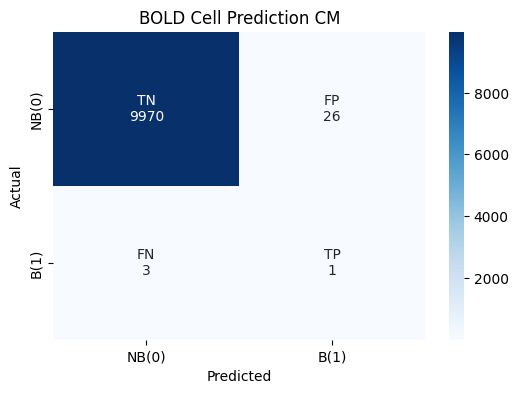


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,9,11,13,15,17
1,0,0,0,0,0,0,0,0,1,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,1,1,0
5,0,0,0,0,0,0,0,1,1,1,1,1
6,0,0,0,0,1,0,0,1,1,1,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,0,0
12,0,1,0,0,0,0,0,0,0,0,0,0
13,0,1,1,0,0,0,0,0,0,0,0,0
14,0,0,0,1,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0
10,1
62,1
86,1
96,1


In [12]:
# Inference on single position of train_loader
infer_one(
    trained_model=trained_model,
    infer_loader=train_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)


Filename: ../data/250_val/09dlnet-ay.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(8,10): 0.862447 | (8,8): 0.864289 | (8,9): 0.865531 | (8,7): 0.865821 | (2,2): 0.867137 | (8,11): 0.867711 | (8,6): 0.868014 | (2,3): 0.868256 | (3,3): 0.869191 | (1,2): 0.869311 | (2,1): 0.869899 | (3,2): 0.870294 | (2,10): 0.871159 | (1,3): 0.871167 | (3,1): 0.871379 | (1,10): 0.871504 | (0,10): 0.871845 | (1,1): 0.872501 | (8,5): 0.873297 | (2,11): 0.873458 | (3,10): 0.873799 | (2,4): 0.874086 | (1,11): 0.874139 | (0,11): 0.874159 | (3,4): 0.874595 | (2,0): 0.874625 | (0,2): 0.874667 | (3,5): 0.874688 | (3,11): 0.874699 | (2,5): 0.874993 | (8,0): 0.875206 | (0,8): 0.875289 | (0,9): 0.875379 | (0,3): 0.875402 | (1,8): 0.875841 | (2,8): 0.875852 | (0,6): 0.875869 | (8,2): 0.875916 | (1,0): 0.875980 | (8,4): 0.875997 | (1,4): 0.876055 | (0,7): 0.876081 | (3,6): 0.876116 | (2,9): 0.876339 | (0,1): 0.876392 | (1,9): 0.876454 | (3,7): 0.876621 | (3,9): 0.876799 | (3,0): 0.876832 | (8,3): 0.8769

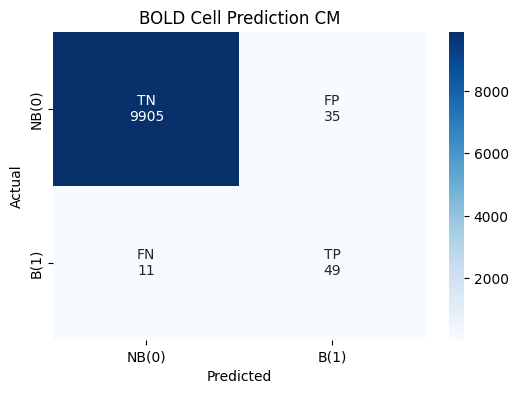


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11
0,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,0,1,1,1,1,1,1,1,1,1
2,1,0,0,0,1,1,1,1,1,1,1,1
3,1,1,1,0,1,1,1,1,1,1,1,1
4,1,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0
8,1,1,1,1,1,1,0,0,0,0,0,0
11,0,0,0,1,1,1,0,1,0,0,0,0
12,0,0,0,1,1,1,0,1,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11
0,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1


In [13]:
# Inference on single position of val_loader
infer_one(
    trained_model=trained_model,
    infer_loader=val_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)


Filename: ../data/250_test/1415-bassessment-1.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
(8,6): 0.868150 | (8,5): 0.873403 | (8,0): 0.874891 | (6,0): 0.875823 | (8,4): 0.876063 | (8,2): 0.876216 | (8,3): 0.877124 | (8,1): 0.877342

NB to B ratio: Predicted = 9925:75 | Actual = 9992:8
Accuracy: 99.31% | Precision: 9.33% | Recall: 87.50% | F1-Score: 0.17



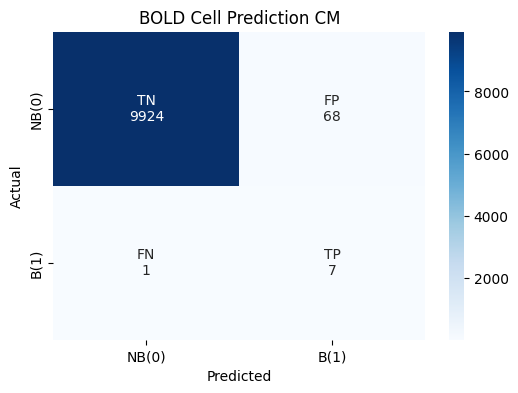


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6
0,1,1,0,0,0,0,0
1,1,1,0,0,0,0,0
2,1,1,0,0,0,0,0
3,1,1,0,0,0,0,0
4,1,1,0,0,0,0,0
6,1,0,0,0,0,0,0
8,1,1,1,1,1,1,0
9,1,1,1,1,1,1,0
10,1,1,1,1,1,1,0
11,0,1,1,1,1,1,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6
6,1,0,0,0,0,0,0
8,1,1,1,1,1,1,1


In [14]:
# Inference on single position of test_loader
infer_one(
    trained_model=trained_model,
    infer_loader=test_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)

## All Examples

Batch Inference: 100%|██████████| 5/5 [01:16<00:00, 15.23s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 1986169:13831 | Actual = 1995414:4586
Accuracy: 99.29% | Precision: 15.33% | Recall: 45.21% | F1-Score: 0.22



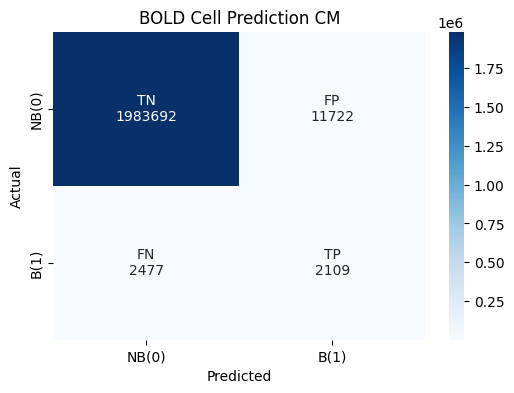

In [15]:
# Infer across all examples of train_loader
infer_full(
    trained_model=trained_model,
    infer_loader=train_loader,
    batch_size=infer_batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)

Batch Inference: 100%|██████████| 1/1 [00:15<00:00, 15.07s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 248211:1789 | Actual = 249279:721
Accuracy: 99.25% | Precision: 17.44% | Recall: 43.27% | F1-Score: 0.25



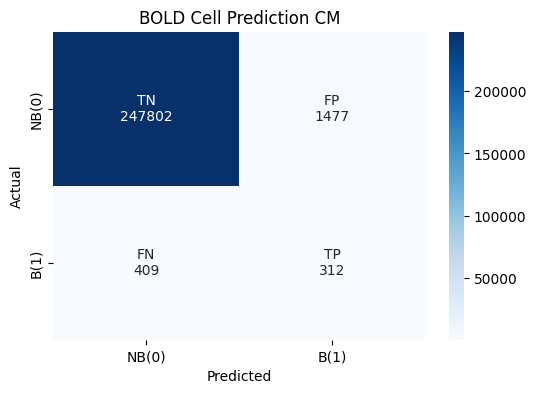

In [16]:
# Infer across all examples of val_loader
infer_full(
    trained_model=trained_model,
    infer_loader=val_loader,
    batch_size=infer_batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)

Batch Inference: 100%|██████████| 1/1 [00:15<00:00, 15.14s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 248259:1741 | Actual = 249447:553
Accuracy: 99.28% | Precision: 14.36% | Recall: 45.21% | F1-Score: 0.22



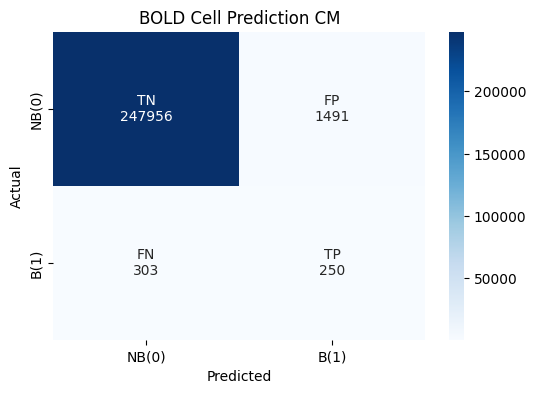

In [17]:
# Infer across all examples of test_loader
infer_full(
    trained_model=trained_model,
    infer_loader=test_loader,
    batch_size=infer_batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)